# Exemplo básico sobre Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4, 
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

print(X[0:10])
print(y[0:10])

[[-1.66853167 -1.29901346  0.2746472  -0.60362044]
 [-2.9728827  -1.08878294  0.70885958  0.42281857]
 [-0.59614125 -1.37007001 -3.11685659  0.64445203]
 [-1.06894674 -1.17505738 -1.91374267  0.66356158]
 [-1.30526888 -0.96592566 -0.1540724   1.19361168]
 [-2.18261832 -0.97011387 -0.09816121 -0.88661426]
 [-1.24797892 -1.13094525 -0.14735366  1.05980629]
 [-1.35308792 -1.06633681  0.02624662 -0.11433516]
 [-1.13449871 -1.27403448  0.74355352  0.21035937]
 [-0.38457445 -1.08840346 -0.00592741  1.36606007]]
[0 0 0 0 0 0 0 0 0 0]


In [17]:
import collections
collections.Counter(y)

Counter({0: 504, 1: 496})

In [18]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, oob_score=True)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [19]:
print(clf.feature_importances_)

[0.14205973 0.76664038 0.0282433  0.06305659]


In [20]:
print(clf.predict([[0, 0, 0, 0]]))

[1]


In [21]:
clf.oob_score_

0.941

# OOB Errors for Random Forests

Automatically created module for IPython interactive environment


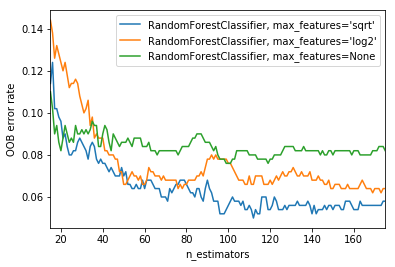

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

print(__doc__)

RANDOM_STATE = 123

# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()